# EDA Case Study: Cardio Good Fitness Analysis

## Dataset Information:

**cardiogoodfitness.csv**: The csv contains data related to customers who have purchased a treadmill from Cardio Good Fitness. The dataset has the following features:

*   **Product** - The model number of the treadmill
*   **Age** - Age of the customer in years
*   **Gender** - Gender of the customer
*   **Education** - Education of the customer in years
*   **Marital Status** - Marital status of the customer
*   **Usage** - Average number of times the customer plans to use the treadmill each week
*   **Fitness** - Self-rated fitness score of the customer (1 - very unfit, 5 - very fit)
*   **Income** - Annual income of the customer
*   **Miles** - Expected number of miles the customer plans to run each week

## Objective

*   Develop a customer profile for each product model.
*   Generate insights and recommendations to help the company target new customers more effectively.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset/CardioGoodFitness.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (180, 9)
Columns: ['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']

First 5 rows:
  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4 

## Questions to be Answered

### 1. How many models does the store have?

# **3 models available: TM195, TM498, TM798**

In [15]:
unique_models = df['Product'].unique()
num_models = len(unique_models)
print(f"Number of models: {num_models}")
print(f"Models available: {list(unique_models)}")

Number of models: 3
Models available: ['TM195', 'TM498', 'TM798']


### 2. Which is the most sold Model?

# TM195

In [16]:
model_sales = df['Product'].value_counts()
print("Sales by Model:")
print(model_sales)
print(f"\nMost sold model: {model_sales.index[0]} ({model_sales.iloc[0]} units)")

Sales by Model:
Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64

Most sold model: TM195 (80 units)


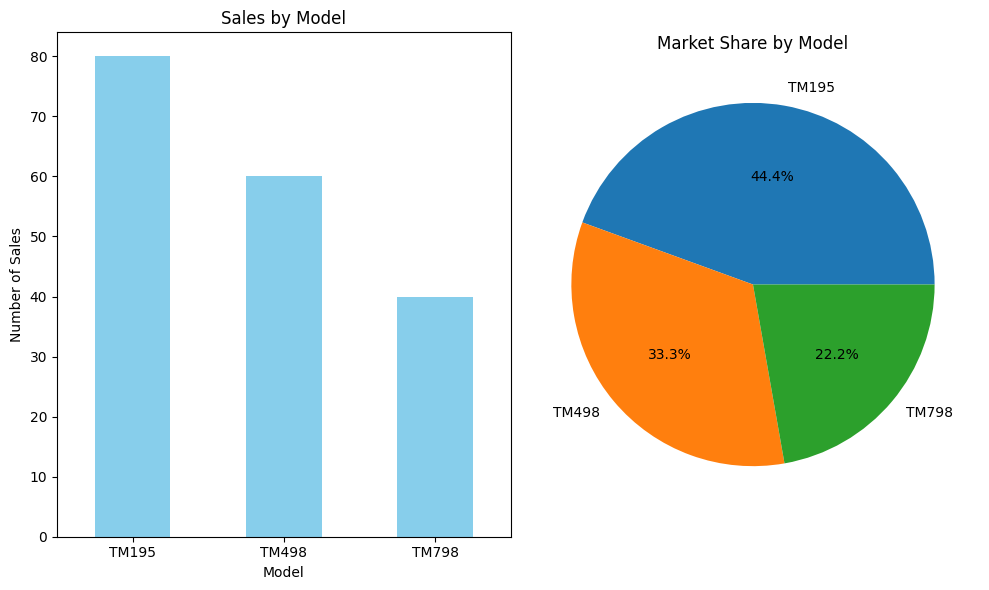

In [17]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
model_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Model')
plt.xlabel('Model')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(model_sales.values, labels=model_sales.index, autopct='%1.1f%%')
plt.title('Market Share by Model')
plt.tight_layout()
plt.show()

### 3. Are male customers buying treadmills more than female customers?

# Yes

In [18]:
gender_sales = df['Gender'].value_counts()
print("Sales by Gender:")
print(gender_sales)
print(f"\nPercentage distribution:")
for gender, count in gender_sales.items():
    print(f"{gender}: {count/len(df)*100:.1f}%")

Sales by Gender:
Gender
Male      104
Female     76
Name: count, dtype: int64

Percentage distribution:
Male: 57.8%
Female: 42.2%


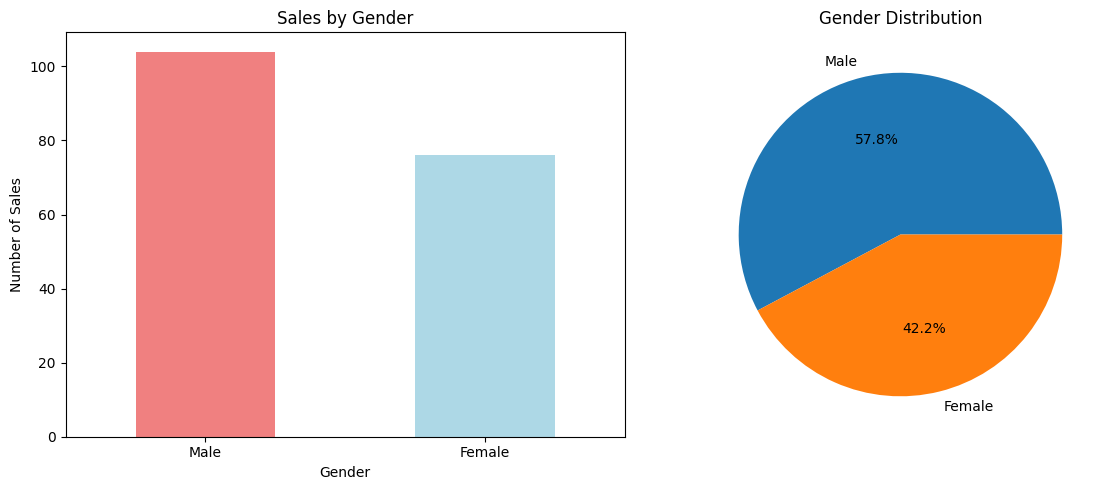

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
gender_sales.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(gender_sales.values, labels=gender_sales.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

### 4. What is the Income, Age, and Education of people buying a treadmill?

# AGE STATISTICS:
+ Mean Age: 28.8 years
+ Median Age: 26.0 years
+ Age Range: 18 - 50 years

# INCOME STATISTICS:
1. Mean Income: 53720
2. Median Income: 50596
3. Income Range: 29562 - 104581

# EDUCATION STATISTICS:
+ Mean Education: 15.6 years
+ Median Education: 16.0 years
+ Education Range: 12 - 21 years

In [20]:
print("AGE STATISTICS:")
print(f"Mean Age: {df['Age'].mean():.1f} years")
print(f"Median Age: {df['Age'].median():.1f} years")
print(f"Age Range: {df['Age'].min()} - {df['Age'].max()} years")

print("\nINCOME STATISTICS:")
print(f"Mean Income: ${df['Income'].mean():.0f}")
print(f"Median Income: ${df['Income'].median():.0f}")
print(f"Income Range: ${df['Income'].min()} - ${df['Income'].max()}")

print("\nEDUCATION STATISTICS:")
print(f"Mean Education: {df['Education'].mean():.1f} years")
print(f"Median Education: {df['Education'].median():.1f} years")
print(f"Education Range: {df['Education'].min()} - {df['Education'].max()} years")

AGE STATISTICS:
Mean Age: 28.8 years
Median Age: 26.0 years
Age Range: 18 - 50 years

INCOME STATISTICS:
Mean Income: $53720
Median Income: $50596
Income Range: $29562 - $104581

EDUCATION STATISTICS:
Mean Education: 15.6 years
Median Education: 16.0 years
Education Range: 12 - 21 years


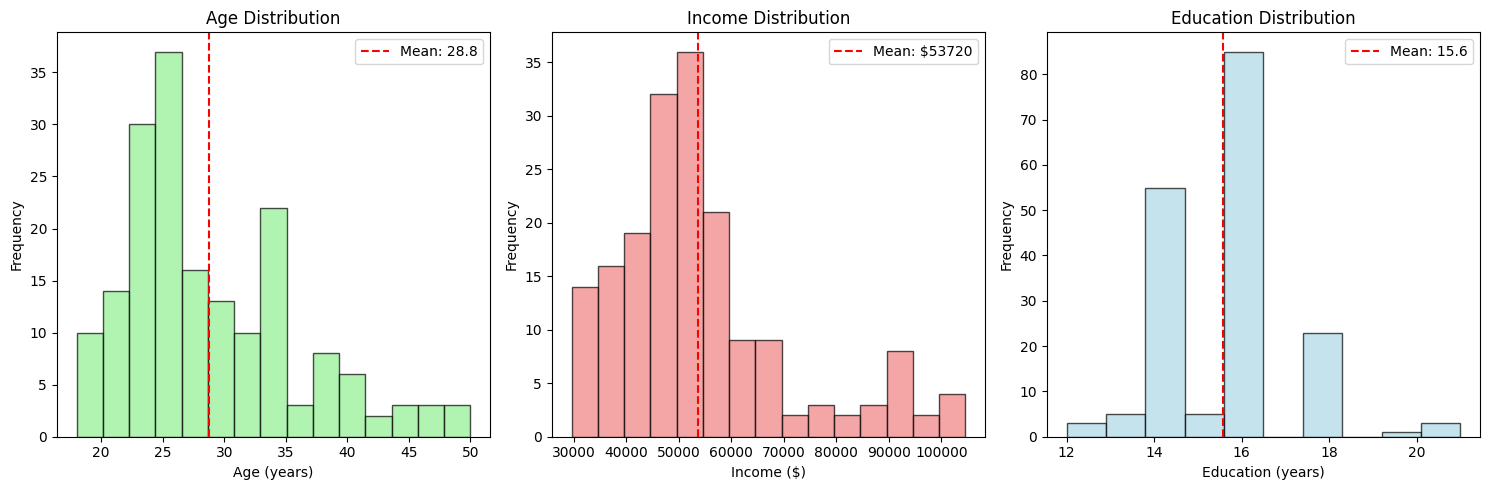

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=15, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(df['Income'], bins=15, color='lightcoral', alpha=0.7, edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')
plt.axvline(df['Income'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Income"].mean():.0f}')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(df['Education'], bins=10, color='lightblue', alpha=0.7, edgecolor='black')
plt.title('Education Distribution')
plt.xlabel('Education (years)')
plt.ylabel('Frequency')
plt.axvline(df['Education'].mean(), color='red', linestyle='--', label=f'Mean: {df["Education"].mean():.1f}')
plt.legend()

plt.tight_layout()
plt.show()

### 5. How many days and miles do customers expect to run on the treadmill?

# USAGE STATISTICS (Days per week):
- Mean Usage: 3.5 Days/week
- Median Usage: 3.0 Days/week
- Usage Range: 2 - 7 Days/week

# MILES STATISTICS:
- Mean Miles: 103.2 miles
- Median Miles: 94.0 miles
- Miles Range: 21 - 360 miles

In [54]:
print("USAGE STATISTICS (Days per week):")
print(f"Mean Usage: {df['Usage'].mean():.1f} Days/week")
print(f"Median Usage: {df['Usage'].median():.1f} Days/week")
print(f"Usage Range: {df['Usage'].min()} - {df['Usage'].max()} Days/week")

print("\nMILES STATISTICS:")
print(f"Mean Miles: {df['Miles'].mean():.1f} miles")
print(f"Median Miles: {df['Miles'].median():.1f} miles")
print(f"Miles Range: {df['Miles'].min()} - {df['Miles'].max()} miles")

USAGE STATISTICS (Days per week):
Mean Usage: 3.5 Days/week
Median Usage: 3.0 Days/week
Usage Range: 2 - 7 Days/week

MILES STATISTICS:
Mean Miles: 103.2 miles
Median Miles: 94.0 miles
Miles Range: 21 - 360 miles


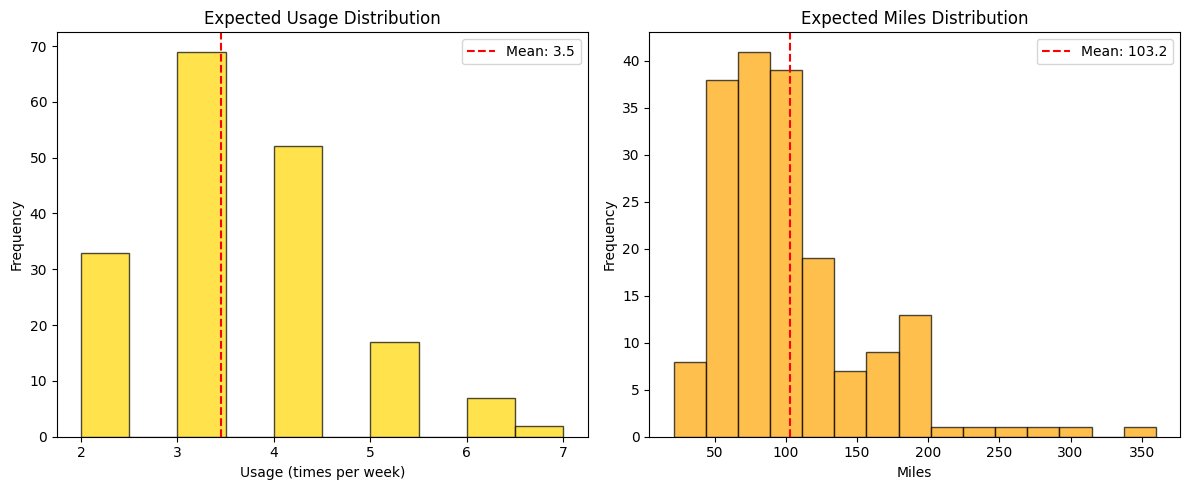

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Usage'], bins=10, color='gold', alpha=0.7, edgecolor='black')
plt.title('Expected Usage Distribution')
plt.xlabel('Usage (times per week)')
plt.ylabel('Frequency')
plt.axvline(df['Usage'].mean(), color='red', linestyle='--', label=f'Mean: {df["Usage"].mean():.1f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['Miles'], bins=15, color='orange', alpha=0.7, edgecolor='black')
plt.title('Expected Miles Distribution')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.axvline(df['Miles'].mean(), color='red', linestyle='--', label=f'Mean: {df["Miles"].mean():.1f}')
plt.legend()

plt.tight_layout()
plt.show()

### 6. What is the self-rated fitness of customers buying a treadmill?

# Fitness Statistics:
- Mean Fitness Rating: 3.31
- Median Fitness Rating: 3.0

In [24]:
fitness_distribution = df['Fitness'].value_counts().sort_index()
print("Fitness Rating Distribution:")
print(fitness_distribution)

print(f"\nFitness Statistics:")
print(f"Mean Fitness Rating: {df['Fitness'].mean():.2f}")
print(f"Median Fitness Rating: {df['Fitness'].median():.1f}")

Fitness Rating Distribution:
Fitness
1     2
2    26
3    97
4    24
5    31
Name: count, dtype: int64

Fitness Statistics:
Mean Fitness Rating: 3.31
Median Fitness Rating: 3.0


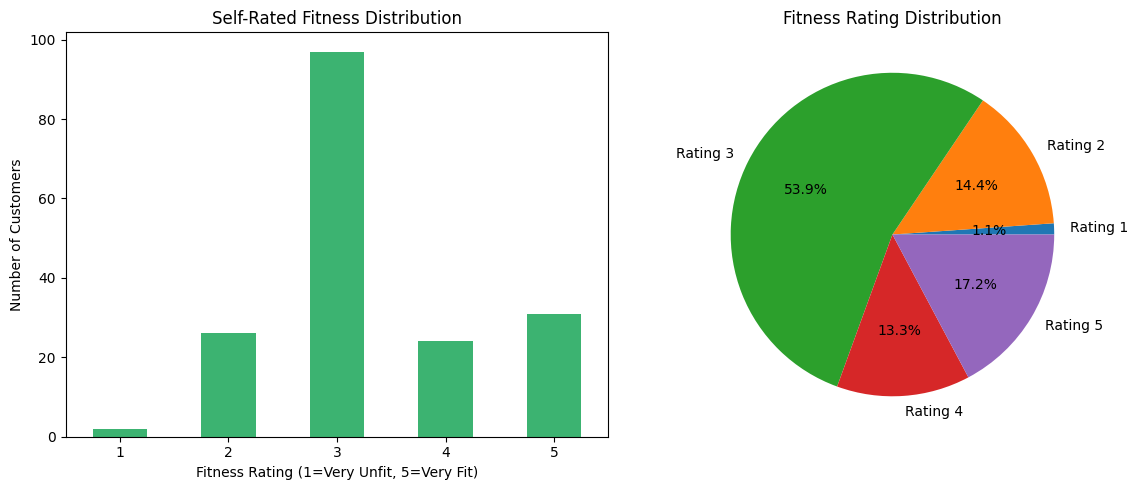

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
fitness_distribution.plot(kind='bar', color='mediumseagreen')
plt.title('Self-Rated Fitness Distribution')
plt.xlabel('Fitness Rating (1=Very Unfit, 5=Very Fit)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(fitness_distribution.values, labels=[f'Rating {i}' for i in fitness_distribution.index], 
        autopct='%1.1f%%')
plt.title('Fitness Rating Distribution')

plt.tight_layout()
plt.show()

### 7. Are married customers buying treadmills more than single customers?

# Yes

In [26]:
marital_sales = df['MaritalStatus'].value_counts()
print("Sales by Marital Status:")
print(marital_sales)
print(f"\nPercentage distribution:")
for status, count in marital_sales.items():
    print(f"{status}: {count/len(df)*100:.1f}%")

Sales by Marital Status:
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

Percentage distribution:
Partnered: 59.4%
Single: 40.6%


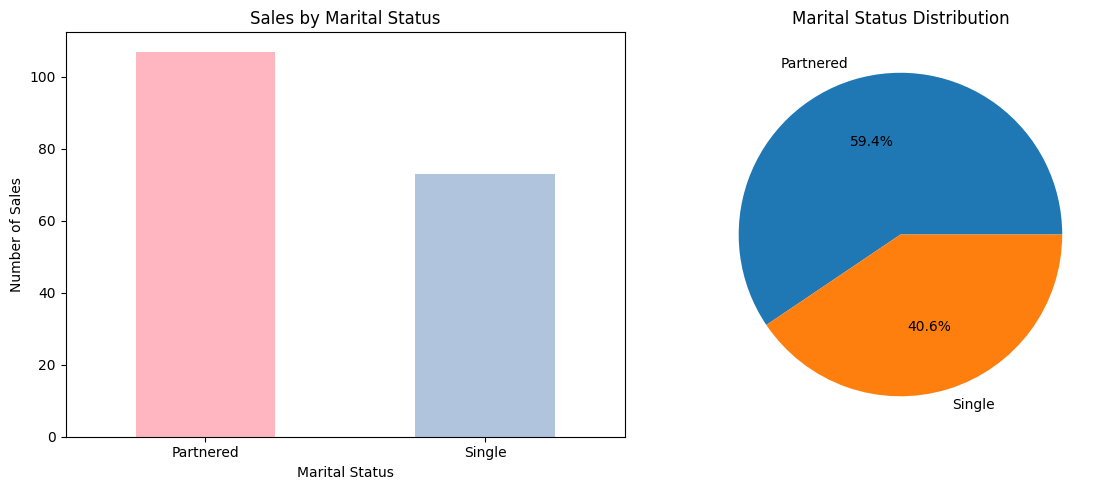

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
marital_sales.plot(kind='bar', color=['lightpink', 'lightsteelblue'])
plt.title('Sales by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(marital_sales.values, labels=marital_sales.index, autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.tight_layout()
plt.show()

### 8. Is there any relation between Income and model?

### Yes, there is a strong positive relationship between income and model choice 

TM798 customers have the highest average income (75,442), 
followed by TM498 (48,974), and TM195 (46,418), 
showing clear income-based market segmentation.

In [28]:
income_by_model = df.groupby('Product')['Income'].describe()
print("Income statistics by Model:")
print(income_by_model)

Income statistics by Model:
         count       mean           std      min       25%      50%      75%  \
Product                                                                        
TM195     80.0  46418.025   9075.783190  29562.0  38658.00  46617.0  53439.0   
TM498     60.0  48973.650   8653.989388  31836.0  44911.50  49459.5  53439.0   
TM798     40.0  75441.575  18505.836720  48556.0  58204.75  76568.5  90886.0   

              max  
Product            
TM195     68220.0  
TM498     67083.0  
TM798    104581.0  


([0, 1, 2], [Text(0, 0, 'TM195'), Text(1, 0, 'TM498'), Text(2, 0, 'TM798')])

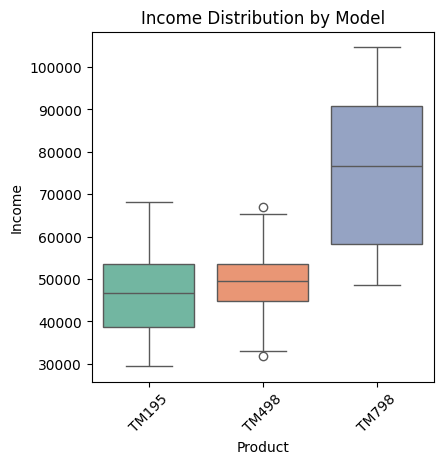

In [30]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='Product', y='Income', hue='Product', palette='Set2', legend=False)
plt.title('Income Distribution by Model')
plt.xticks(rotation=45)

### 9. Is there any relation between Age and model?

### No, there is no significant relationship between age and model choice 
all three models have very similar average ages (TM195: 28.6, TM498: 28.9, TM798: 29.1 years) with overlapping age ranges, indicating age is not a determining factor in model preference.

In [31]:
age_by_model = df.groupby('Product')['Age'].describe()
print("Age statistics by Model:")
print(age_by_model)

Age statistics by Model:
         count   mean       std   min    25%   50%    75%   max
Product                                                        
TM195     80.0  28.55  7.221452  18.0  23.00  26.0  33.00  50.0
TM498     60.0  28.90  6.645248  19.0  24.00  26.0  33.25  48.0
TM798     40.0  29.10  6.971738  22.0  24.75  27.0  30.25  48.0


([0, 1, 2], [Text(0, 0, 'TM195'), Text(1, 0, 'TM498'), Text(2, 0, 'TM798')])

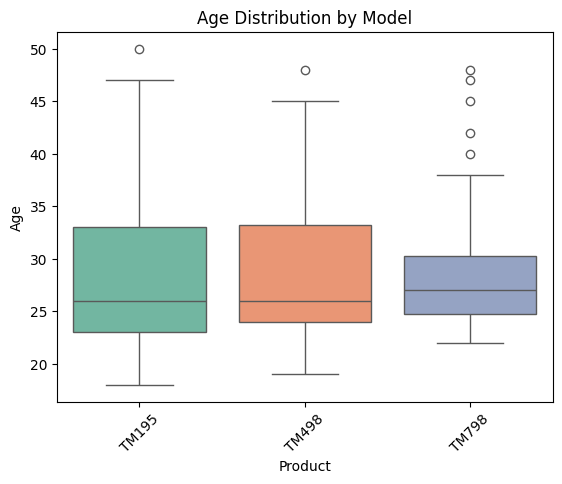

In [33]:
sns.boxplot(data=df, x='Product', y='Age', hue='Product', palette='Set2', legend=False)
plt.title('Age Distribution by Model')
plt.xticks(rotation=45)

### 10. Is there any relation between self-rated fitness and model?`

### Yes, 
there is a strong relationship between self-rated fitness and model choice - TM798 customers have significantly higher fitness ratings (mean: 4.6) compared to TM195 (2.96) and TM498 (2.90), indicating that fitter customers prefer the premium model.

In [34]:
fitness_by_model = df.groupby('Product')['Fitness'].describe()
print("Fitness statistics by Model:")
print(fitness_by_model)

Fitness statistics by Model:
         count    mean       std  min  25%  50%  75%  max
Product                                                  
TM195     80.0  2.9625  0.664540  1.0  3.0  3.0  3.0  5.0
TM498     60.0  2.9000  0.629770  1.0  3.0  3.0  3.0  4.0
TM798     40.0  4.6250  0.667467  3.0  4.0  5.0  5.0  5.0


([0, 1, 2], [Text(0, 0, 'TM195'), Text(1, 0, 'TM498'), Text(2, 0, 'TM798')])

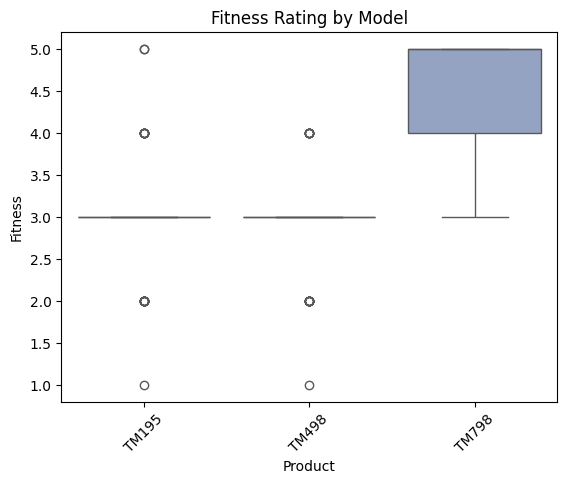

In [38]:
sns.boxplot(data=df, x='Product', y='Fitness', hue='Product', palette='Set2', legend=False)
plt.title('Fitness Rating by Model')
plt.xticks(rotation=45)

### 11. Is there any relation between education and model?

### Yes, 

there is a moderate relationship between education and model choice

TM798 customers have higher education levels (mean: 17.3 years) compared to TM195 (15.0) and TM498 (15.1), indicating that more educated customers tend to prefer the premium model.

In [39]:
education_by_model = df.groupby('Product')['Education'].describe()
print("Education statistics by Model:")
print(education_by_model)

Education statistics by Model:
         count       mean       std   min   25%   50%   75%   max
Product                                                          
TM195     80.0  15.037500  1.216383  12.0  14.0  16.0  16.0  18.0
TM498     60.0  15.116667  1.222552  12.0  14.0  16.0  16.0  18.0
TM798     40.0  17.325000  1.639066  14.0  16.0  18.0  18.0  21.0


([0, 1, 2], [Text(0, 0, 'TM195'), Text(1, 0, 'TM498'), Text(2, 0, 'TM798')])

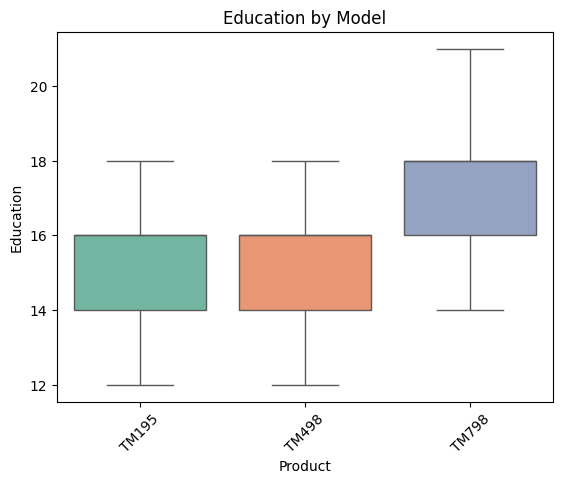

In [41]:
sns.boxplot(data=df, x='Product', y='Education', hue='Product', palette='Set2', legend=False)
plt.title('Education by Model')
plt.xticks(rotation=45)

### 12. Does gender have any effect on the model a customer buys?

### Yes, 

gender has a significant effect on model choice

while TM195 and TM498 have balanced gender distribution (50-50% and 48-52%), TM798 is heavily male-dominated with 82.5% male customers, indicating men strongly prefer the premium model.

In [42]:
gender_model_crosstab = pd.crosstab(df['Product'], df['Gender'])
print("Gender distribution by Model:")
print(gender_model_crosstab)
print("\nPercentage distribution:")
print(gender_model_crosstab.div(gender_model_crosstab.sum(axis=1), axis=0) * 100)

Gender distribution by Model:
Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33

Percentage distribution:
Gender      Female       Male
Product                      
TM195    50.000000  50.000000
TM498    48.333333  51.666667
TM798    17.500000  82.500000


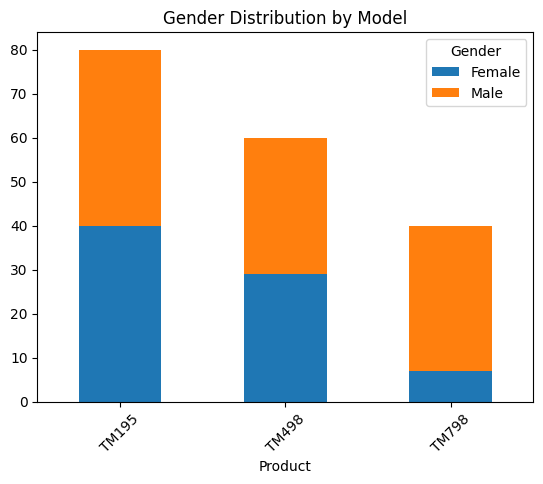

In [55]:
gender_model_crosstab.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Gender Distribution by Model')
plt.xticks(rotation=45)
plt.legend(title='Gender')

### 13. Does Marital status have any effect on the model a customer buys?

### No, marital status has minimal effect on model choice

all three models show very similar distributions with approximately 60% partnered and 40% single customers across TM195 (60-40%), TM498 (60-40%), and TM798 (57.5-42.5%).

In [56]:
marital_model_crosstab = pd.crosstab(df['Product'], df['MaritalStatus'])
print("Marital Status distribution by Model:")
print(marital_model_crosstab)
print("\nPercentage distribution:")
print(marital_model_crosstab.div(marital_model_crosstab.sum(axis=1), axis=0) * 100)

Marital Status distribution by Model:
MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17

Percentage distribution:
MaritalStatus  Partnered  Single
Product                         
TM195               60.0    40.0
TM498               60.0    40.0
TM798               57.5    42.5


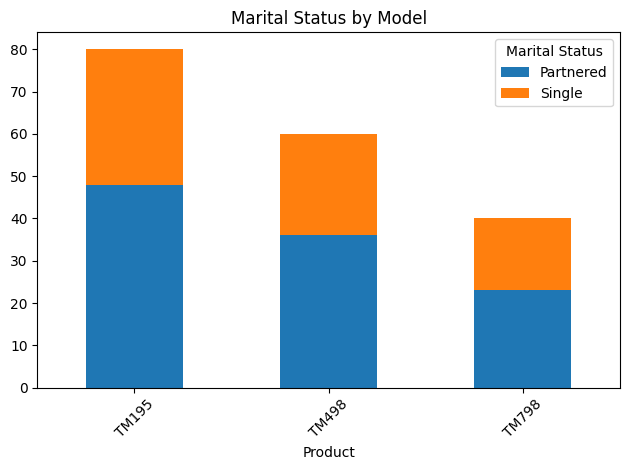

In [46]:
marital_model_crosstab.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Marital Status by Model')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')

plt.tight_layout()
plt.show()

### 14. Are there different age groups buying different models?

### No, there are no significant differences in age groups buying different models

all three models show similar age distribution patterns with the majority of customers (79 customers total) concentrated in the 18-25 and 26-35 age groups across all models, indicating age group is not a determining factor in model preference.

In [47]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], 
                        labels=['18-25', '26-35', '36-45', '46-55', '55+'])

age_group_model = pd.crosstab(df['Age_Group'], df['Product'])
print("Age Group distribution by Model:")
print(age_group_model)

Age Group distribution by Model:
Product    TM195  TM498  TM798
Age_Group                     
18-25         34     28     17
26-35         32     24     17
36-45         11      7      4
46-55          3      1      2


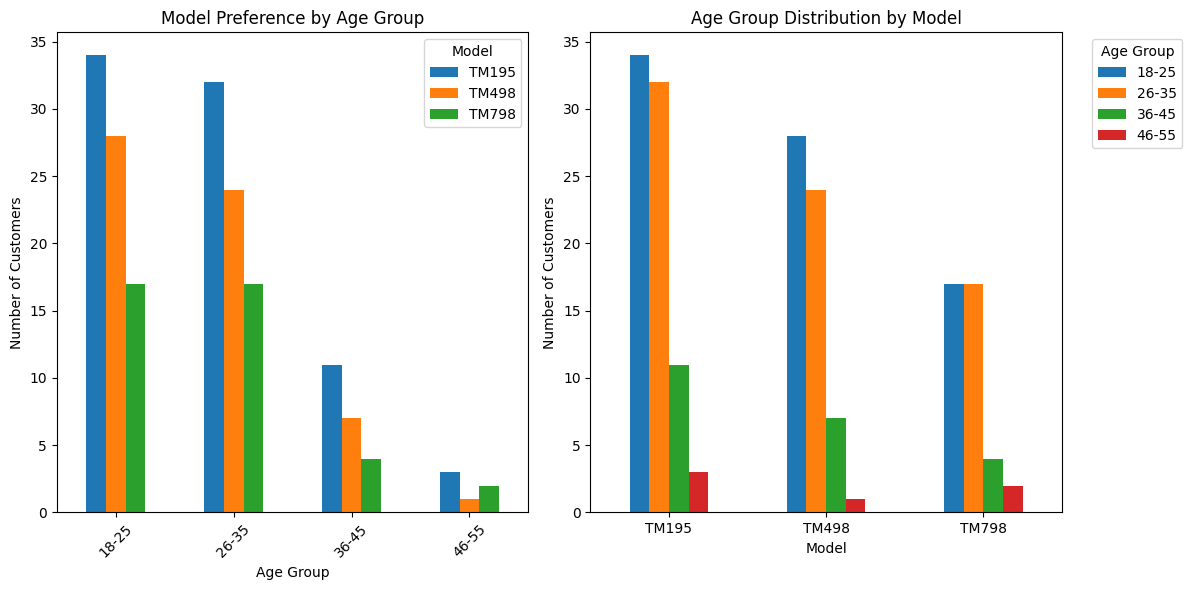

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
age_group_model.plot(kind='bar', ax=plt.gca())
plt.title('Model Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Model')

plt.subplot(1, 2, 2)
age_group_model.T.plot(kind='bar', ax=plt.gca())
plt.title('Age Group Distribution by Model')
plt.xlabel('Model')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### 15. What is the relation between Age, Income, Education, and the model bought?

### There is a strong relationship between Income, Education, Fitness and model choice, but not Age:

- TM798 customers have significantly higher income ($75,442 vs ~$47,000)
- TM798 customers have higher education (17.3 vs ~15.1 years)
- TM798 customers have higher fitness (4.6 vs ~2.9)
- Age remains similar across all models (~28-29 years)

Conclusion: Affluent, educated, and fit customers prefer premium models regardless of age.

In [49]:
model_profiles = df.groupby('Product').agg({
    'Age': ['mean', 'std'],
    'Income': ['mean', 'std'],
    'Education': ['mean', 'std'],
    'Usage': ['mean', 'std'],
    'Miles': ['mean', 'std'],
    'Fitness': ['mean', 'std']
}).round(2)

print("Comprehensive Model Profiles:")
print(model_profiles)


Comprehensive Model Profiles:
           Age          Income           Education       Usage         Miles  \
          mean   std      mean       std      mean   std  mean   std    mean   
Product                                                                        
TM195    28.55  7.22  46418.02   9075.78     15.04  1.22  3.09  0.78   82.79   
TM498    28.90  6.65  48973.65   8653.99     15.12  1.22  3.07  0.80   87.93   
TM798    29.10  6.97  75441.58  18505.84     17.32  1.64  4.78  0.95  166.90   

               Fitness        
           std    mean   std  
Product                       
TM195    28.87    2.96  0.66  
TM498    33.26    2.90  0.63  
TM798    60.07    4.62  0.67  


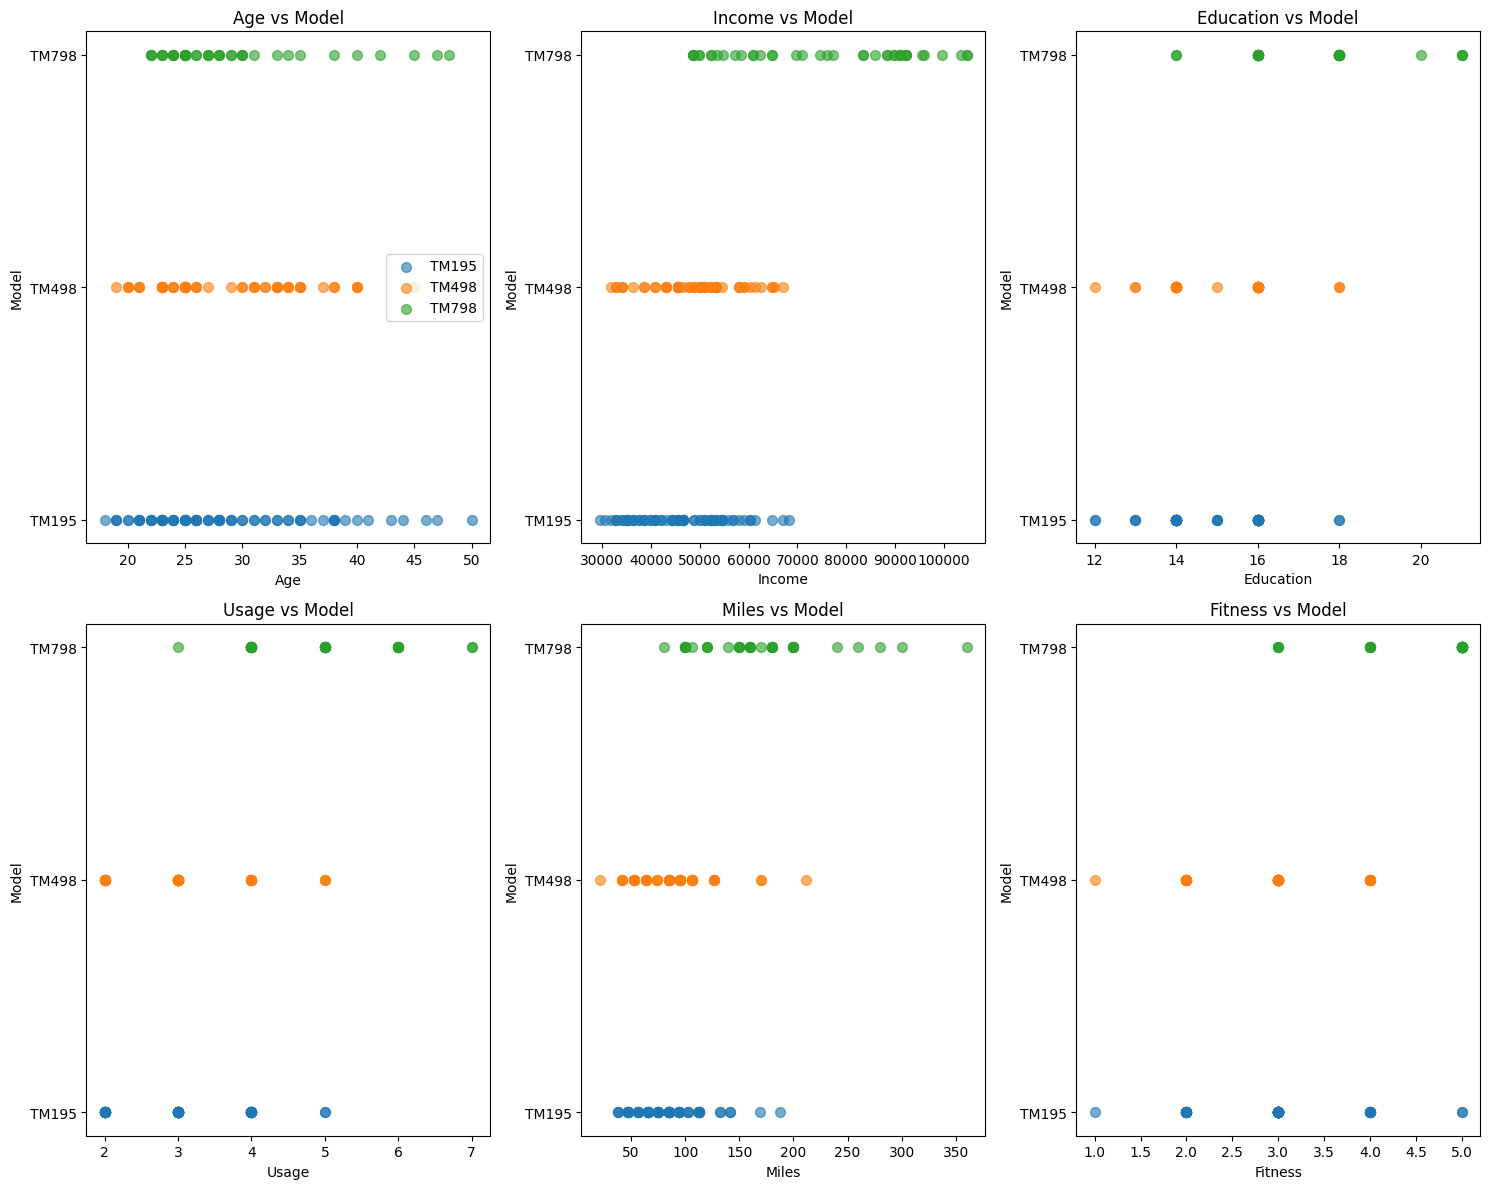

In [51]:
# Correlation analysis
plt.figure(figsize=(15, 12))

# Create scatter plots for key relationships
numerical_cols = ['Age', 'Income', 'Education', 'Usage', 'Miles', 'Fitness']

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    for model in df['Product'].unique():
        model_data = df[df['Product'] == model]
        plt.scatter(model_data[col], model_data['Product'], 
                   alpha=0.6, label=model, s=50)
    plt.xlabel(col)
    plt.ylabel('Model')
    plt.title(f'{col} vs Model')
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.show()

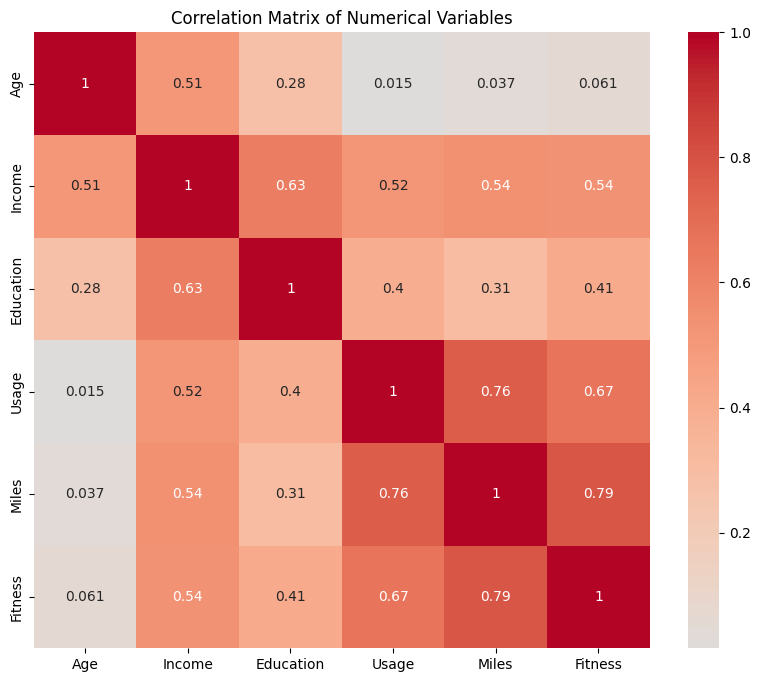

In [52]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()